<a href="https://colab.research.google.com/github/sletz17/Number-plate-location-and-extraction-of-plate-to-csv/blob/main/License_plate_extractor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install pytesseract
!apt install tesseract-ocr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 19 not upgraded.
Need to get 4,850 kB of archives.
After this operation, 16.3 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1 [1,598 kB]
Get:2 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr amd64 4.1.1-2build2 [262 kB]
Fetched 4,850 kB in 1s (4,870 kB/s)
Selecting previously unselected package tesseract-ocr-eng.
(Reading database .

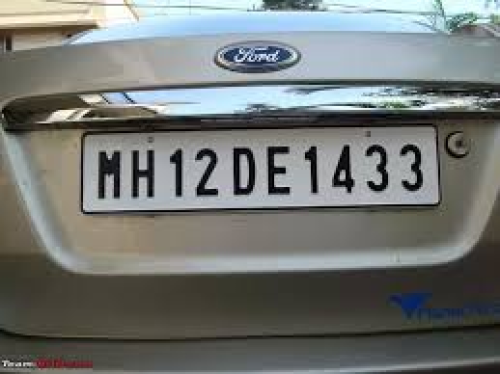

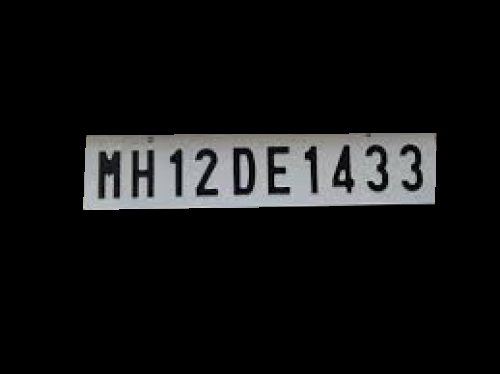

The number plate is:  MH1IZDE1433



In [3]:
import numpy as np
import cv2
import  imutils
import sys
import pytesseract
import pandas as pd
import time
from google.colab.patches import cv2_imshow
pytesseract.pytesseract.tesseract_cmd = r'/usr/bin/tesseract'

image = cv2.imread('/content/car.jpeg')

image = imutils.resize(image, width=500)

cv2_imshow(image)

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#cv2.imshow("1 - Grayscale Conversion", gray)

gray = cv2.bilateralFilter(gray, 11, 17, 17)
#cv2.imshow("2 - Bilateral Filter", gray)

edged = cv2.Canny(gray, 170, 200)
#cv2.imshow("4 - Canny Edges", edged)

(cnts, new,) = cv2.findContours(edged.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
cnts=sorted(cnts, key = cv2.contourArea, reverse = True)[:30] 
NumberPlateCnt = None 

count = 0
for c in cnts:
        peri = cv2.arcLength(c, True)
        approx = cv2.approxPolyDP(c, 0.02 * peri, True)
        if len(approx) == 4:  
            NumberPlateCnt = approx 
            break

# Masking the part other than the number plate
mask = np.zeros(gray.shape,np.uint8)
new_image = cv2.drawContours(mask,[NumberPlateCnt],0,255,-1)
new_image = cv2.bitwise_and(image,image,mask=mask)
cv2_imshow(new_image)

# Configuration for tesseract
config = ('-l eng --oem 1 --psm 3')

# Run tesseract OCR on image
text = pytesseract.image_to_string(new_image, lang='eng', config='--psm 6')

#Data is stored in CSV file
raw_data = {'date': [time.asctime( time.localtime(time.time()) )], 
        'v_number': [text]}

df = pd.DataFrame(raw_data, columns = ['date', 'v_number'])
df.to_csv('data.csv')

# Print recognized text
print("The number plate is: ",text)